In [34]:
import pandas as pd

In [35]:
df=pd.read_csv('Social_Network_Ads.csv')

In [36]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [38]:
df.drop('User ID', inplace=True, axis=1)

In [39]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [40]:
Gender=pd.get_dummies(df['Gender'],drop_first=True)

In [41]:
Sex.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [42]:
df=pd.concat([df,Sex], axis=1)

In [43]:
df.head()

,Gender,Age,EstimatedSalary,Purchased,Male
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,0,1


In [44]:
df.drop('Gender',axis=1,inplace=True)

In [45]:
df.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [46]:
import seaborn as sns

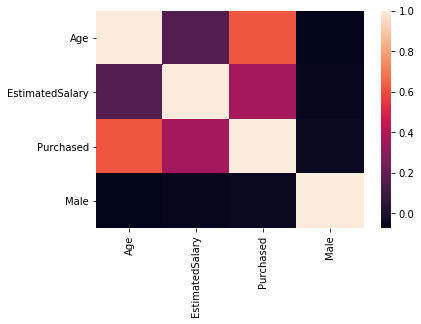

In [47]:
sns.heatmap(df.corr())

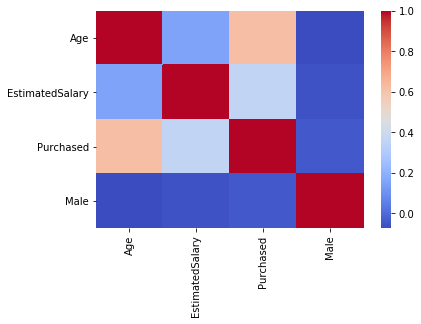

In [48]:
# Male is not colleted to purchased
sns.heatmap(df.corr(), cmap='coolwarm')

In [50]:
df.drop('Male',axis=1,inplace=True)

In [51]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
ss=StandardScaler()

In [60]:
Scaler_array=ss.fit_transform(df.drop('Purchased',axis=1))

In [62]:
Scaler_array

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [ ]:
y=df['Purchased']

In [69]:
import numpy as np

In [70]:
l=[[1,2],[2,3],[4,5]]

In [71]:
narr=np.array(l)

In [72]:
narr

array([[1, 2],
       [2, 3],
       [4, 5]])

In [73]:
narr[:,0]

array([1, 2, 4])

In [74]:
narr[:,1]

array([2, 3, 5])

In [75]:
import matplotlib.pyplot as plt

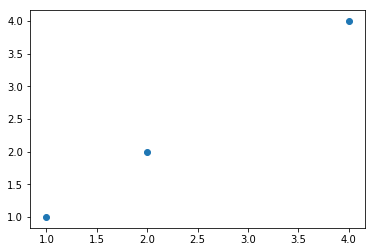

In [76]:
plt.scatter(narr[:,0],narr[:,0])

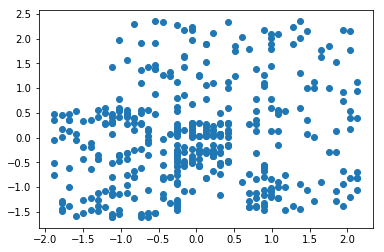

In [77]:
plt.scatter(Scaler_array[:,0],Scaler_array[:,1])

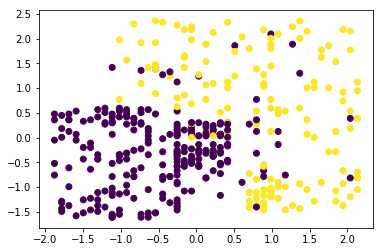

In [78]:
# mapping with scaling array and color distribute Purchased column i.e 0 and 1
plt.scatter(Scaler_array[:,0],Scaler_array[:,1],c=y)

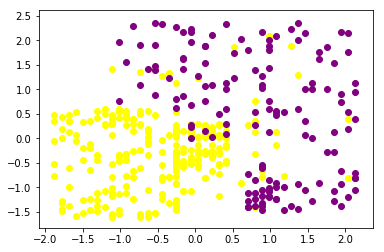

In [79]:
plt.scatter(Scaler_array[y==0,0],Scaler_array[y==0,1],color='yellow')
plt.scatter(Scaler_array[y==1,0],Scaler_array[y==1,1],color='purple')

In [59]:
y=df['Purchased']

In [63]:
x=pd.DataFrame(data=Scaler_array,columns=df.columns[:-1])

In [65]:
x.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [66]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split

In [80]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3)

In [81]:
from sklearn.svm import SVC

In [82]:
model=SVC()

In [83]:
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [84]:
ypred=model.predict(x_test)

In [85]:
from sklearn.metrics import confusion_matrix

In [86]:
confusion_matrix(y_test,ypred)

array([[66,  7],
       [ 7, 40]], dtype=int64)

In [87]:
x_test.head()

,Age,EstimatedSalary
38,-1.113206,0.066291
191,-1.781797,-1.284492
7,-0.540127,2.356750
180,-1.113206,-1.578141
289,-0.062561,0.242480


In [88]:
x_test['Actual']=y_test

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [89]:
x_test.head()

,Age,EstimatedSalary,Actual
38,-1.113206,0.066291,0
191,-1.781797,-1.284492,0
7,-0.540127,2.356750,1
180,-1.113206,-1.578141,0
289,-0.062561,0.242480,1


In [90]:
x_test['predict']=ypred

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [91]:
x_test

,Age,EstimatedSalary,Actual,predict
38,-1.113206,0.066291,0,0
191,-1.781797,-1.284492,0,0
7,-0.540127,2.356750,1,1
180,-1.113206,-1.578141,0,0
289,-0.062561,0.242480,1,0
248,0.319491,-0.521006,0,0
294,-0.253587,-0.374182,0,0
317,-0.253587,-0.432911,0,0
52,-0.826666,0.389305,0,0
385,1.752188,-0.286087,1,1
